In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
pd.read_csv('../data/new_sales4.csv', encoding='euc-kr')

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,티슈,크리넥스？키즈용？화장지？3겹？27m 8롤,1.000000,201902,0.32
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199511,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00
199512,201912283245128,2019-12-29,2019-12-30,2020-01-01,NaN,201912281058007,65880,52065,아이_생활용품,하기스 매직핏 꿀벅지 아기용 기저귀 3단계 공용 198매(밴드형),1.000000,201912,0.21
199513,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21
199514,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00


In [14]:
product_df = pd.read_csv('../data/new_product6.csv', low_memory=False, encoding='euc-kr')
product_df = product_df[['물품대분류', '물품판매량']]
product_df['물품대분류'] = product_df['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)
product_df

,물품대분류,물품판매량
0,이벤트,15
1,이벤트,10
2,이벤트,27
3,이벤트,12
4,이벤트,4
...,...,...
2969,기저귀,160
2970,기저귀,79
2971,기저귀,72
2972,기저귀,55


In [15]:
product_grouped = product_df.groupby('물품대분류').sum()
product_grouped = product_grouped.reset_index()
product_grouped = product_grouped.sort_values(by='물품판매량', ascending=False)
product_grouped

,물품대분류,물품판매량
0,기저귀,56854
8,이벤트,35908
4,수유용품,26364
12,티슈,22994
5,아이_생활용품,13388
3,생리대,12374
10,주방용품,9707
11,청결용품,5850
13,화장품,5308
2,마스크,4520


/var/folders/dn/nwjs23j94h3489_1w10d3x280000gr/T/ipykernel_28344/2431495481.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


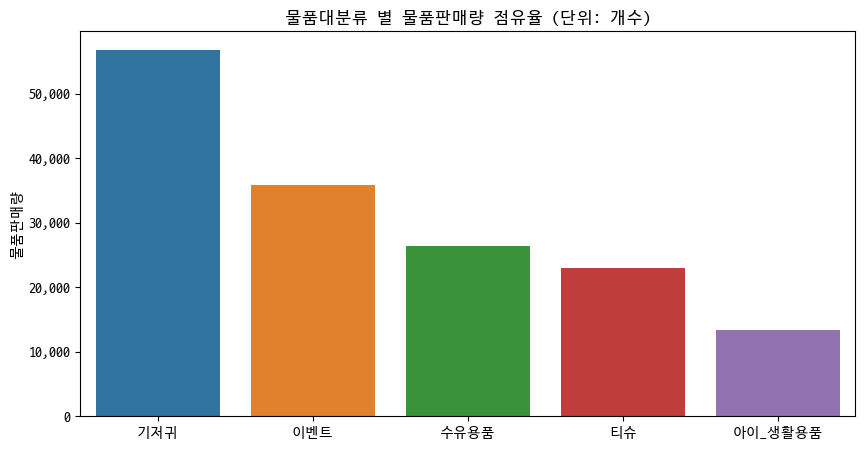

In [16]:
product_grouped = product_grouped.iloc[:5]

plt.figure(figsize=(10, 5))
sns.barplot(x='물품대분류', y='물품판매량', data=product_grouped)
plt.title('물품대분류 별 물품판매량 점유율 (단위: 개수)')
plt.xlabel(None)
# y축에 1000 단위 콤마 넣기
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()